### Agenda
1. Homework 2: [Kaggle Competition](https://docs.google.com/document/d/1ctW62_-hncYeahdhdQRBqAwauI10O1gVcqKX1b1KZs4/edit?usp=sharing)
2. Some Public Datasets: [Google dataset search](https://toolbox.google.com/datasetsearch), [NYC Open Data](https://data.cityofnewyork.us/browse), [Data.gov](https://catalog.data.gov/dataset), [UN Data](http://data.un.org/), [Quandle](https://www.quandl.com/), [MovieLens](https://grouplens.org/datasets/movielens/), [Quora's meta list of datasets](https://www.quora.com/Data/Where-can-I-find-large-datasets-open-to-the-public)
3. SKlearn
    1. Dimensionality Reduction: PCA 
    2. Clustering: K-means (DS4biz p.169 - 173)

### 3 (A): Dimensionality Reduction with PCA
[SKlearn PCA Documents](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) <br>
[Learn more about the seedsdataset](https://archive.ics.uci.edu/ml/index.php)

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [27]:
# Load seedsdataset.csv 
df = pd.read_csv('seedsdataset.csv')
# df.head()
# print(df)

In [7]:
#turn dataframe into Numpy Array with shape (n_samples, n_features)
df_ft = df.drop('wheat_variety', axis = 1)
X = df_ft.values
X.shape

(210, 7)

In [22]:
#load sklearn pca, reduce dimension from 7 to 3
pca = PCA(n_components = 3)

#project
X_proj = pca.fit_transform(X)

#check shape
X_proj

array([[ 6.63448376e-01, -1.41732098e+00,  4.12356541e-02],
       [ 3.15666512e-01, -2.68922915e+00,  2.31726953e-01],
       [-6.60499302e-01, -1.13150635e+00,  5.27087232e-01],
       [-1.05527590e+00, -1.62119002e+00,  4.37015260e-01],
       [ 1.61999921e+00, -2.18338442e+00,  3.33990920e-01],
       [-4.76938007e-01, -1.33649437e+00,  3.55360614e-01],
       [-1.84834720e-01, -1.50364411e-01,  1.41497264e-01],
       [-7.80629616e-01, -1.12979883e+00,  2.79757608e-01],
       [ 2.28210810e+00, -1.36001690e+00, -3.50729413e-01],
       [ 1.97854147e+00, -1.49468793e+00, -2.93947251e-03],
       [ 3.69122947e-01,  8.86722511e-01,  1.13264978e-01],
       [-7.11021200e-01, -2.10663730e+00,  1.37552595e-01],
       [-1.21370535e+00,  9.46878939e-02,  4.85809237e-01],
       [-1.16908541e+00, -7.42962899e-01,  2.58209340e-01],
       [-1.19272176e+00, -9.53268162e-01,  2.58450639e-01],
       [-5.08171207e-01,  3.77958424e-01,  6.56217572e-01],
       [-1.37469698e+00,  1.32290559e+00

In [11]:
#check explained variance by each principal directions
pca.explained_variance_ratio_

array([0.8293852 , 0.16363245, 0.00565791])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69], dtype=int64),)
(array([ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139], dtype=int64),)
(array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 

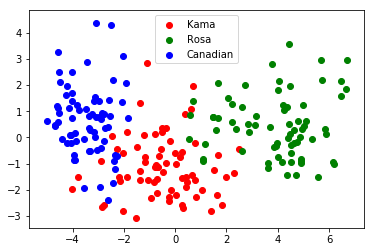

In [25]:
#plot 

import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']
cls = ['Kama', 'Rosa', 'Canadian']

for i in range(len(cls)):
    ix = np.where(df['wheat_variety'].values == i + 1)
    #print(ix)
    #print("======")
    plt.scatter(X_proj[ix, 0], X_proj[ix, 1], c = colors[i] , label = cls[i])
plt.legend()

plt.show()

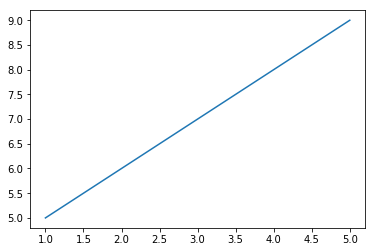

In [21]:
import matplotlib.pyplot as plt
plt.plot(np.array([1, 2, 3, 4, 5]), np.array([5, 6, 7, 8, 9]))

### 3 (B): Clustering with K-means 
[SKlearn K-means Documents](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html)


In [32]:
from sklearn import metrics
from sklearn.cluster import KMeans

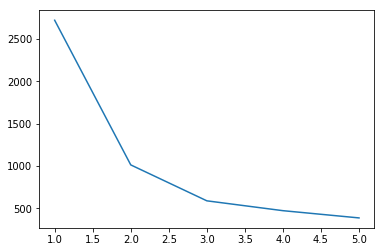

In [37]:
#decide number of clusters by inertia (the 'elbow' method)
#inertia: sum of squared distances to the closest centroid for all observations in the training set
num_cluster = []
inertia = []
for i in range(1,6):
    clf = KMeans(init='k-means++', n_clusters = i, n_init=10)
    clf.fit(X)
    num_cluster.append(i)
    inertia.append(clf.inertia_)

#plot
plt.plot(num_cluster, inertia)

In [39]:
chosen_cluster = 3
clf = KMeans(init='k-means++', n_clusters = chosen_cluster, n_init=10)
clf.fit(X)
clf.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
centroids = clf.cluster_centers_
centroids

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

Text(0.5, 1.0, 'K-means clustering; centroids are black crosses.')

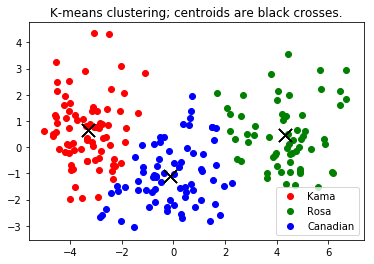

In [41]:
#plot k-means clustering results

## centroids
centroids = clf.cluster_centers_
centroids_proj = pca.transform(centroids)

## scatter plot
colors = ['red', 'green', 'blue']
cls = ['Kama', 'Rosa', 'Canadian']

for i in range(len(cls)):
    ix = np.where(clf.labels_ == i)
    plt.scatter(X_proj[ix, 0], X_proj[ix, 1], c = colors[i] , label = cls[i])
    plt.scatter(centroids_proj[:, 0], centroids_proj[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)

plt.legend()
plt.title('K-means clustering; centroids are black crosses.')